# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [2]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## Preprocessing Data

In [3]:
# replace numbers in 'day_of_week' column with text
days_of_week=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
accidents['day_of_week']=accidents['day_of_week'].replace(
                                    to_replace=[1,2,3,4,5,6,7],
                                    value=days_of_week
)

In [4]:
# convert 'time' and 'hour' columns to accidents data
accidents['time'] = pd.to_datetime(accidents['time'])
accidents['hour'] = pd.DatetimeIndex(accidents['time']).hour

In [5]:
# create column for months
accidents['date'] = pd.to_datetime(accidents['date'])
accidents['month'] = accidents['date'].dt.month

In [6]:
# look up keys for urban or rural areas
urban_rural=lookup[lookup['field name']=='urban_or_rural_area']

In [7]:
# convert 'code/format' column of 'urban_rural' to integer
urban_rural['code/format'] = urban_rural['code/format'].astype('int')

In [8]:
# replace codes in "urban_or_rural_area column of accidents to descriptive text
codes = list(urban_rural['code/format'])
urban_or_rural = list(urban_rural['label'])

accidents['urban_or_rural_area'] = accidents['urban_or_rural_area'].replace(
                                                                to_replace = codes,
                                                                value = urban_or_rural
                                                                )

## Examining major accidents by days of week

In [9]:
# add column identifying if accident is major
accidents['major'] = (accidents['number_of_casualties']>=3)

In [10]:
# filter data for major accidents
major_accidents = accidents[accidents['major']==True]

In [11]:
# count major accidents by day of week
major_accidents.groupby('day_of_week')['major'].sum()

day_of_week
Friday       798
Monday       614
Saturday     820
Sunday       687
Thursday     645
Tuesday      621
Wednesday    632
Name: major, dtype: int64

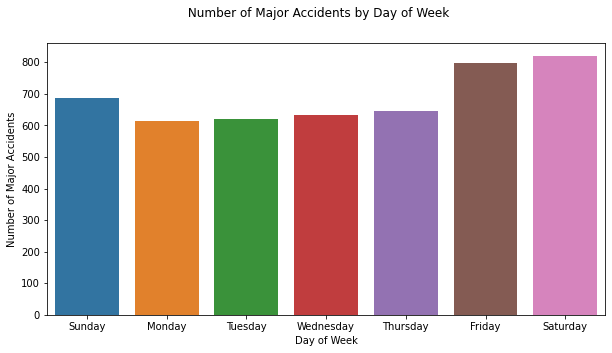

In [12]:
# import dependencies for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot major accidents by day of week
sns.countplot(x='day_of_week', data=major_accidents, order=days_of_week)
plt.gcf().set_size_inches(10,5)
plt.suptitle(' Number of Major Accidents by Day of Week')
plt.ylabel('Number of Major Accidents')
plt.xlabel('Day of Week')
plt.show()

Major accidents seem to happen most on Fridays and Saturdays. In our data, 798 major accidents happened on Fridays and 820 happened on Saturdays. Sundays seemed to also have more accidents than most weekdays with 687 major accidents in the data set.

There seems to be a pattern with accidents increasing gradually over week days. Mondays had 614 major accidents and this gradually increased to 645 major accidents on Thursdays. This then sharply increased to 798 major accidents, as pointed out above, on Fridays. 

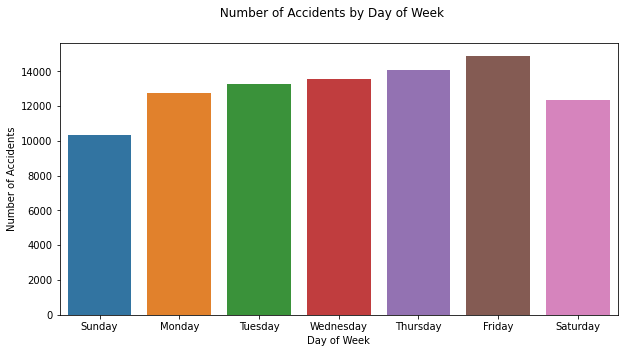

In [13]:
# plot accidents by day of week
sns.countplot(x='day_of_week', data=accidents, order=days_of_week)
plt.gcf().set_size_inches(10,5)
plt.suptitle(' Number of Accidents by Day of Week')
plt.ylabel('Number of Accidents')
plt.xlabel('Day of Week')
plt.show()

Looking at the overall data though, accidents tend to trend upward through the weekdays, but are less prevalent during weekends. This suggests that in order to address major accidents, it would be more focus on the weekends and Fridays more than the rest of the week.

## What time of day do major accidents happen the most?

Do major accidents tend to happen more during specific times of the day? How about accidents overall? Do they differ in pattern?

In [14]:
# count major accidents by hour of day
major_accidents.groupby('hour')['hour'].count()

hour
0      94
1      73
2      54
3      48
4      33
5      41
6      65
7     110
8     197
9     149
10    211
11    242
12    272
13    312
14    372
15    401
16    433
17    374
18    341
19    286
20    232
21    159
22    181
23    137
Name: hour, dtype: int64

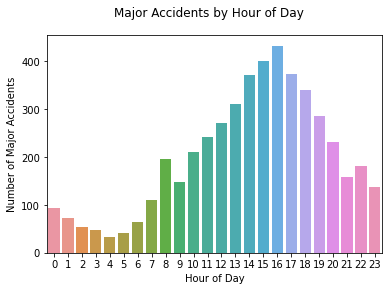

In [15]:
# plot major accidents by time of day
sns.countplot(x='hour', data=major_accidents)
plt.ylabel('Number of Major Accidents')
plt.xlabel('Hour of Day')
plt.suptitle('Major Accidents by Hour of Day')
plt.show()

Major accidents seemed to peak during the late afternoon/early evening hours. In this data set, the hour between 4PM and 5PM has the most major accidents at 433. In fact, the number of major accidents increases every hour--except for the hour between 8AM and 9AM--from the early morning hour between 4AM and 5AM at 33 major accidents until the peak between 4PM and 5PM. From 5PM there's a noticeable decrease every hour--except for the hour between 9PM and 10PM--until the low point between 4AM and 5AM.

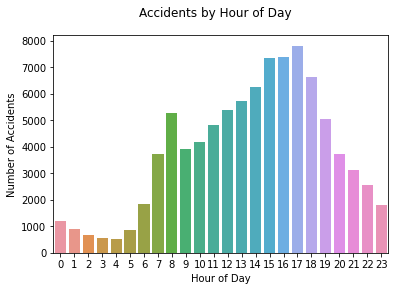

In [16]:
# plot non-major accidents by time of day
sns.countplot(x='hour', data=accidents)
plt.ylabel('Number of Accidents')
plt.xlabel('Hour of Day')
plt.suptitle('Accidents by Hour of Day')
plt.show()

With the overall data, accidents follow a similar pattern throughout the day as major accidents. Accidents happen the least often in the early morning hours, then increase until they peak in the late afternoon/early evening hours. In other words, there's no unique pattern by time of day for major accidents.

This suggests that by focusing general accident prevention measures throughout the daytime hours could prevent major accidents.

## Do the number of cars matter?


In [17]:
# calculate percentage of major accidents by number of vehicles involved
major_vehicles=major_accidents.groupby(['number_of_vehicles'])['number_of_vehicles'].count()/len(major_accidents)*100
print(round(major_vehicles,2))

number_of_vehicles
1     11.96
2     61.35
3     18.79
4      5.58
5      1.31
6      0.71
7      0.04
8      0.17
9      0.04
10     0.04
11     0.02
Name: number_of_vehicles, dtype: float64


In [19]:
# calculate percentage of accidents by number of vehicles involved
accidents_vehicles=accidents.groupby(['number_of_vehicles'])['number_of_vehicles'].count()/len(accidents)*100
print(round(accidents_vehicles,2))

number_of_vehicles
1     28.21
2     62.93
3      6.84
4      1.46
5      0.36
6      0.11
7      0.05
8      0.02
9      0.00
10     0.00
11     0.00
12     0.00
13     0.00
Name: number_of_vehicles, dtype: float64


In [20]:
# Calculate percentage of major accidents that involved at least three vehicles
major_three_or_more = major_accidents[major_accidents['number_of_vehicles']>2]['accident_index'].count()
major_three_or_more_perc = major_three_or_more/len(major_accidents)*100
print(f'Percentage of major accidents that involve at least three vehicles: {round(major_three_or_more_perc,2)}%')

Percentage of major accidents that involve at least three vehicles: 26.7%


In [21]:
# calculate percentage of non-major accidents by number of vehicles involved
accidents_three_or_more = accidents[accidents['number_of_vehicles']>2]['accident_index'].count()
accidents_three_or_more_perc = accidents_three_or_more/len(accidents)*100
print(f'Percentage of non-major accidents that involve at least three vehicles: {round(accidents_three_or_more_perc,2)}%')

Percentage of non-major accidents that involve at least three vehicles: 8.86%


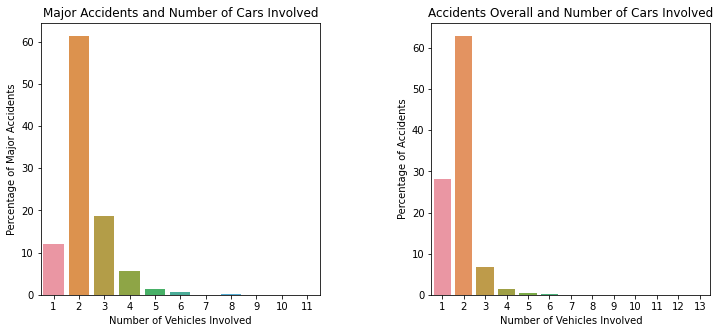

In [31]:
# plot the percentages of non-major and major accidents by number of vehicles involved
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=major_vehicles.index, y=major_vehicles, ax=axes[0])
axes[0].set_xlabel("Number of Vehicles Involved")
axes[0].set_ylabel("Percentage of Major Accidents")
axes[0].set_title("Major Accidents and Number of Cars Involved")

sns.barplot(x=accidents_vehicles.index, y=accidents_vehicles, ax=axes[1])
axes[1].set_xlabel("Number of Vehicles Involved")
axes[1].set_ylabel("Percentage of Accidents")
axes[1].set_title("Accidents Overall and Number of Cars Involved")

plt.subplots_adjust(wspace = 0.4)
plt.show()

While the majority of both major and all accidents involved just two vehicles--approximately 61.35% for major accidents and 66.44% for accidents overall--major accidents more frequently involved three or more vehicles than did accidents in general. In fact, approximately 26.7% of major accidents involved at least three vehicles while only about 8.86% of all accidents did.

## Do major accidents tend to happen more in urban or rural areas?

In [27]:
# Calculate percentage of major accidents that happen in urban and rural areas
major_urban_rural=major_accidents.groupby('urban_or_rural_area')['urban_or_rural_area'].count()/len(major_accidents)*100
print(round(major_urban_rural,2))

urban_or_rural_area
Rural    48.23
Urban    51.77
Name: urban_or_rural_area, dtype: float64


In [28]:
# Drop rows in overall data where 'urban_or_rural_area' is 'Unallocated'
accidents_allocated=accidents[accidents['urban_or_rural_area']!='Unallocated']

# Calculate percentage of accidents overall that happen in urban and rural areas
urban_rural=accidents_allocated.groupby('urban_or_rural_area')['urban_or_rural_area'].count()/len(accidents_allocated)*100
print(round(urban_rural,2))

urban_or_rural_area
Rural    32.29
Urban    67.71
Name: urban_or_rural_area, dtype: float64


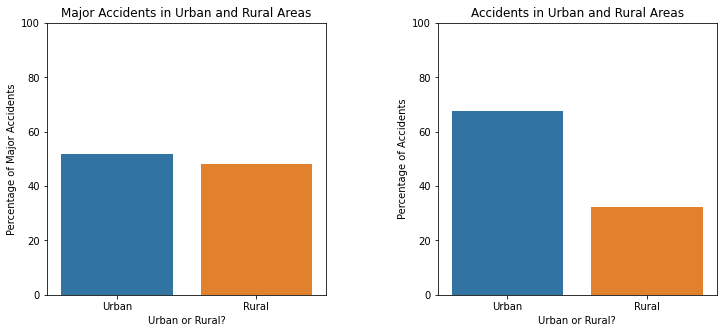

In [29]:
# plot the percentages of non-major and major accidents by whether they're in urban or rural areas
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=major_urban_rural.index, y=major_urban_rural, ax=axes[0], order=['Urban','Rural'])
axes[0].set_xlabel("Urban or Rural?")
axes[0].set_ylabel("Percentage of Major Accidents")
axes[0].set_title("Major Accidents in Urban and Rural Areas")
axes[0].set(ylim=(0,100))

sns.barplot(x=urban_rural.index, y=urban_rural, ax=axes[1], order=['Urban','Rural'])
axes[1].set_xlabel("Urban or Rural?")
axes[1].set_ylabel("Percentage of Accidents")
axes[1].set_title("Accidents in Urban and Rural Areas")
axes[1].set(ylim=(0,100))

plt.subplots_adjust(wspace = 0.4)
plt.show()

While accidents overall are overwhelmingly in urban areas--approximately 67.71% were in urban areas--major accidents were more evenly split with about 51.77% having occured in urban areas and about 48.23% in rural areas.

This might suggest that in order to prevent major accidents, preventative measures should focus more in rural areas.